In [53]:
import pandas as pd

# Curso Alura - Machine Learning: Lidando com dados de muitas dimensões

## Aula 01 - Dados com muitas dimensões

projeto chamado Alura Care, uma startup fictícia do segmento de saúde que tem por objetivo tornar mais rápida e efetiva a detecção de determinados tipos de câncer. A Alura Care possui uma base de dados contendo o diagnóstico do tipo de câncer, que pode ser maligno (M) ou benigno (B), e diversos exames/dimensões que caracterizam esse diagnóstico.

Temos 33 dimensões nessa base de dados, e a questão que a Alura Care deseja responder é: será possível reduzirmos a necessidade de tantos exames para chegar a um diagnóstico de maneira efetiva

### Carregando a Base de Dados

In [54]:
uri = "https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"

resultados_exames  = pd.read_csv(uri)

resultados_exames .head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


### Verificando Valores NAN

In [55]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Somente a coluna Exame 33, possui valores NAN e a maioria são NANs, opção nesse caso será Remover essa coluna.

In [56]:
resultados_exames_tratado = resultados_exames.drop(columns="exame_33")

### Separando nosso X e y

In [57]:
valores_exames = resultados_exames_tratado.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames_tratado.diagnostico

### Separando os Dados de Treino e Teste

In [58]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

### Rodando um Modelo de Floresta Aleatória

In [59]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


### Baseline

In [60]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 66.67%


Assim, sabemos que um classificador inocente, que sempre "chuta" o mesmo valor, não chega nem perto da acurácia que conseguimos com o Random Forest, legitimando-o como um bom classificador

## Aula 02 - Avançando e explorando dados

usaremos a função melt() do Panda, que consegue pegar um dataframe e transformá-lo em uma tabela contendo as variáveis, os valores dessas variáveis e as classes pertencentes a elas

In [61]:
dados_plot = pd.concat([diagnostico, valores_exames.iloc[:,0:10]], axis = 1)

In [62]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


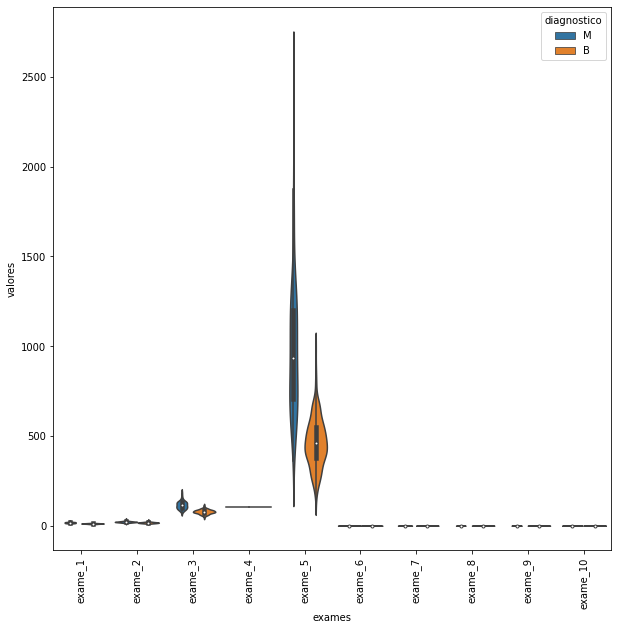

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot)

plt.xticks(rotation = 90)

plt.show()

### Padronização dos Dados

In [64]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)

valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames.keys())

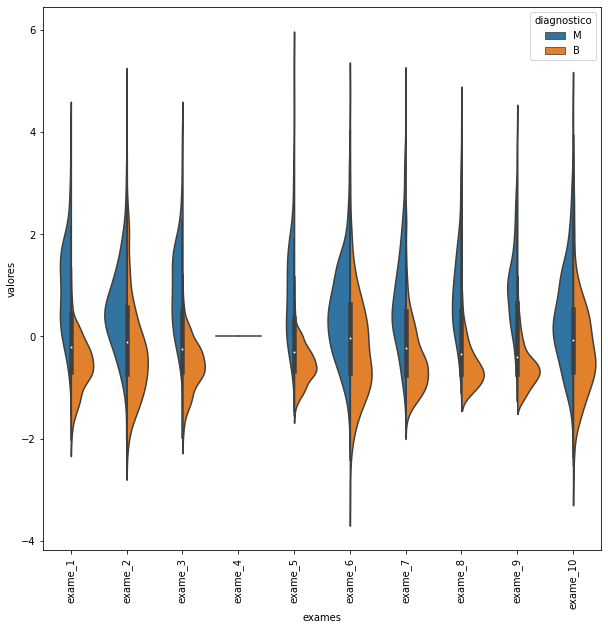

In [65]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")


plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot,
               split = True)

plt.xticks(rotation = 90)

plt.show()

Uma variável com dados constante não ajuda na classificação. Isso acontece com o Exame 4, é uma valor com valor constante por isso aparece uma linha no gráfico, por isso ela será removida da Análise

In [66]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

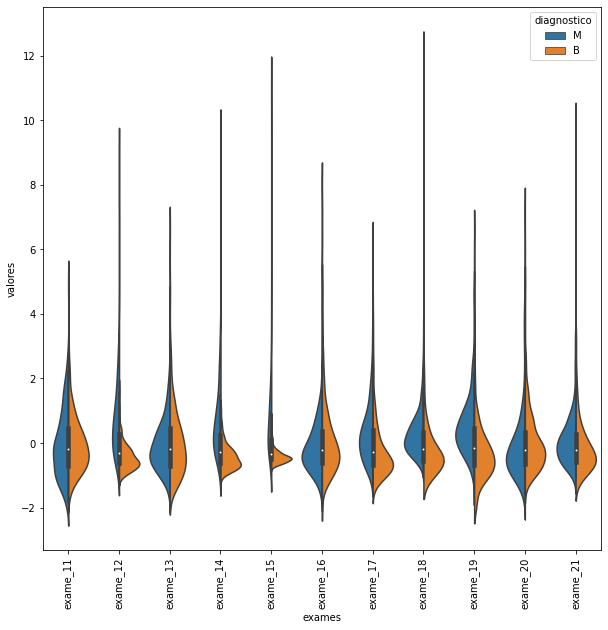

In [67]:
grafico_violino(valores_exames_v2, 10, 21)

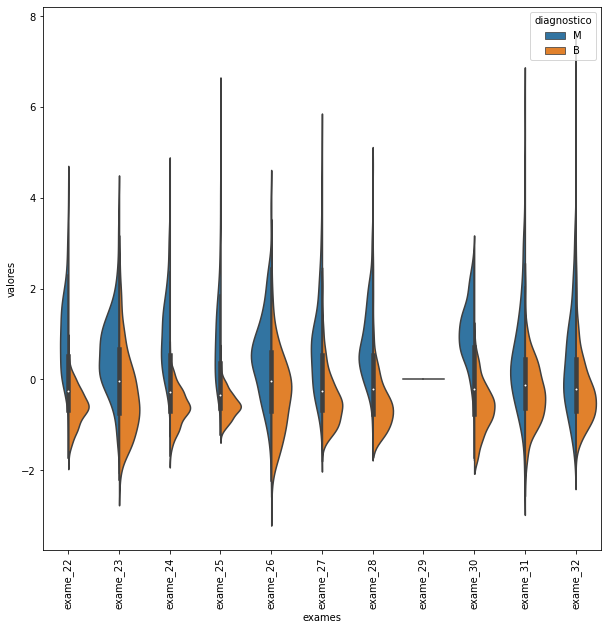

In [68]:
grafico_violino(valores_exames_v2, 21, 32)

In [69]:
valores_exames_v2.drop(columns=["exame_29","exame_4"], inplace=True)

In [70]:
def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [71]:
classificar(valores_exames_v2)

Resultado da classificação 93.57%


## Aula 03 - Dados Correlacionados

### Correlação

In [72]:
matriz_correlacao = valores_exames_v2.corr()

<AxesSubplot:>

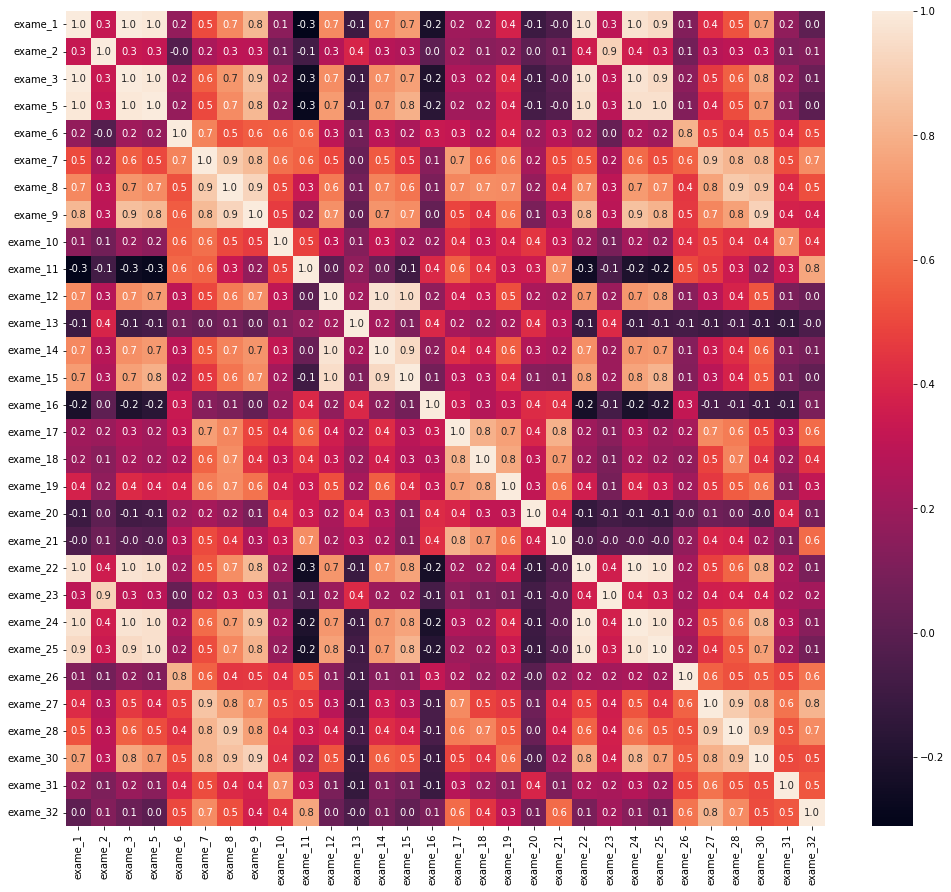

In [73]:
plt.figure(figsize = (17, 15))

sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

### Dados Altamente Correlacionados

In [74]:
matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]

In [75]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [76]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v3)

Resultado da classificação 94.15%


## Aula 04 - Automatizando a seleção

### SelectKBest

 a partir de uma função matemática, ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores.

Na chamada, além de um número k de features, precisaremos passar a função matemática que deverá ser utilizada. Uma função muito utilizada é o Qui-quadrado, que usaremos para inferir quais features serão mais representativas para nosso processo de classificação. A partir do módulo sklearn.feature_selection, importaremos também a função chi2, que passaremos como parâmetro de SelectKBest().

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, 5)
selecionar_kmelhores

In [ ]:
valores_exames_v4 = valores_exames.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000018CD94643A0>)

In [ ]:
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

treino_kbest.shape

(398, 5)

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 93.57%


### Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  6,  60]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

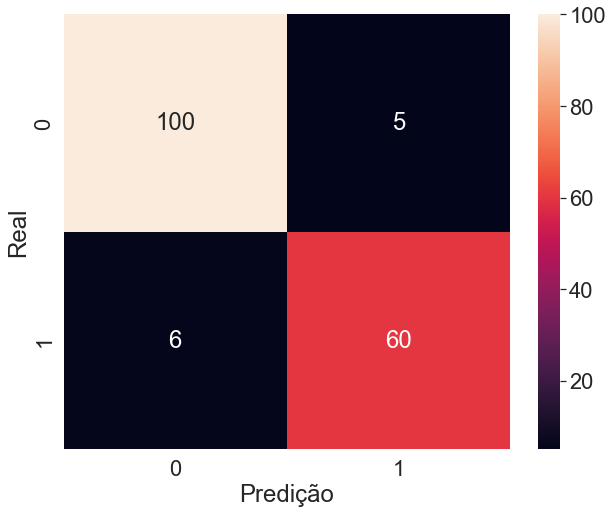

In [ ]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Nosso algoritmo está acertando no 0, 100 dos 105 casos e no 60 dos 6 casos.

### RFE

RFE - Recursive Feature Elimination, algo como "Eliminação de Feature por Recursão".

nova técnica, por meio da acurácia, que será nossa forma de avaliação, nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia

In [ ]:
from sklearn.feature_selection import RFE

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)

Resultado da classificação 90.06%


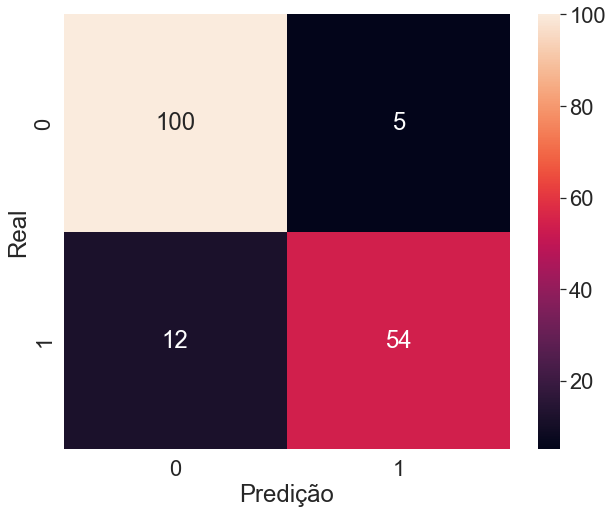

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

## Aula 05 - Visualizando os dados no plano

### RFECV

divide o nosso banco de dados em blocos e aplica o algoritmo RFE, que acabamos de aprender, em cada um desses blocos, gerando diferentes resultados. Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, como também quais features são essas

Resultado da classificação 92.98%


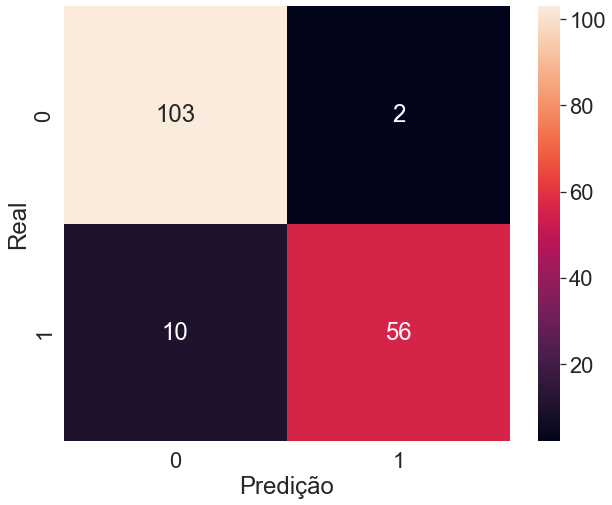

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

<function matplotlib.pyplot.show(close=None, block=None)>

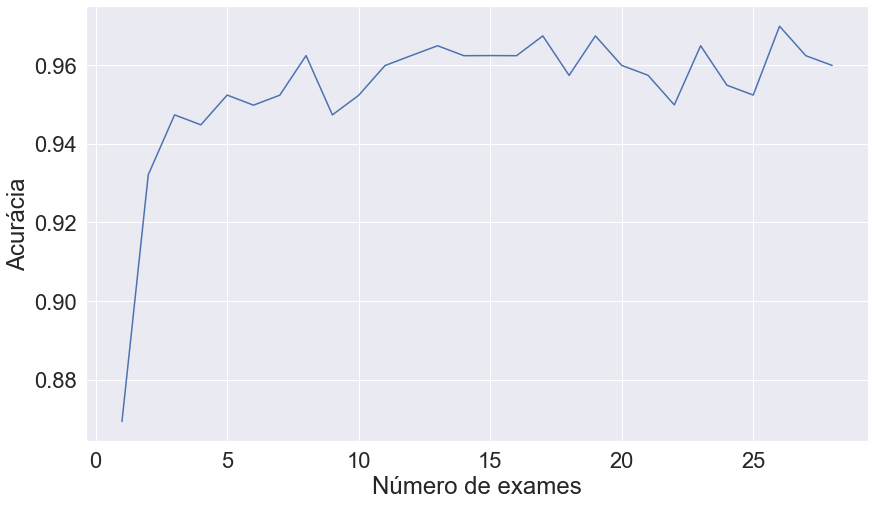

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show

Todos os métodos que utilizamos até o momento (SelectKBest, RFE e RFECV) selecionaram, como um filtro, algumas features, e por isso são chamados de "métodos de seleção de features" (feature selection methods)

### PCA

 técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o PCA. O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v3)

<AxesSubplot:>

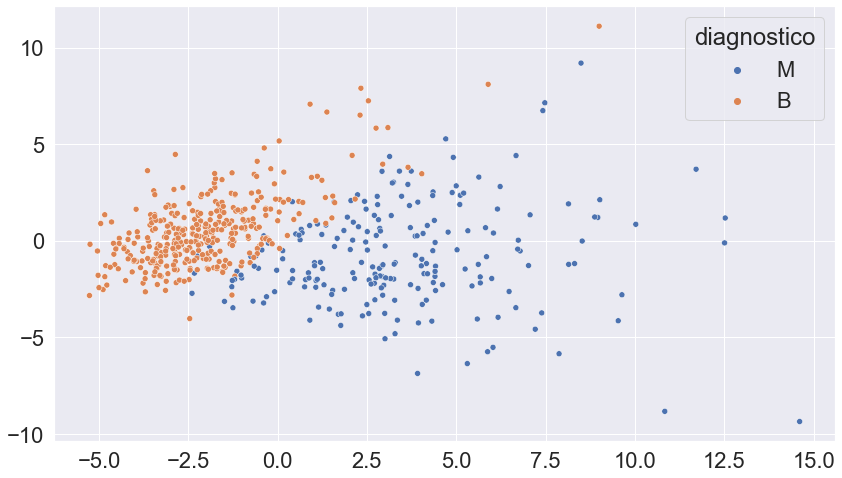

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

### TSNE

técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

Por exemplo, se calcularmos a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

In [ ]:
from sklearn.manifolds import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v3)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

Essas técnicas que realizam uma transformação matemática nos dados antes de processá-los, reduzindo suas dimensões, são chamadas justamente de "redução de dimensionalidade". A diferença entre a redução de dimensionalidade e a seleção de features é que a segunda funciona como um funil que filtra as principais características de uma base de dados originaL.